# Comparative Analysis of UPI Fraud Detection using Ensemble Learning


## Project Goals
1. Develop accurate fraud detection models using machine learning
2. Compare and evaluate different algorithms' performance
3. Identify key patterns and indicators of fraudulent transactions
4. Provide actionable insights for fraud prevention
5. Create a deployable solution for real-time fraud detection

### Importing Libraries

In [6]:
# Importing Libaries

# import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import streamlit as st
warnings.filterwarnings('ignore')

# Data Collection

In [7]:
# Load dataset
df = pd.read_csv(r"C:\Users\trang\OneDrive\Desktop\UPI FRAUD DETECTION FINAL\UPI-Fraud-detection-main\UPI Latest data.csv")



In [8]:
#Datatypes overview
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   Date                          50000 non-null  object 
 2   Time                          50000 non-null  object 
 3   Merchant_ID                   50000 non-null  object 
 4   Customer_ID                   50000 non-null  object 
 5   Device_ID                     50000 non-null  object 
 6   Transaction_Type              50000 non-null  object 
 7   Payment_Gateway               50000 non-null  object 
 8   Transaction_City              50000 non-null  object 
 9   Transaction_State             50000 non-null  object 
 10  IP_Address                    50000 non-null  object 
 11  Transaction_Status            50000 non-null  object 
 12  Device_OS                     50000 non-null  

In [9]:

# Check for corrupted data in the DataFrame

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Only print columns with missing values

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

# Check for invalid data types
print("\nData types of each column:")
print(df.dtypes)

# Check for any invalid entries in specific columns (example for 'amount' column)
invalid_amounts = df[~df['amount'].apply(lambda x: isinstance(x, (int, float)))]
print(f"\nInvalid entries in 'amount' column:")
print(invalid_amounts)

# Check for outliers in numerical columns (example for 'amount' column)
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]
print(f"\nOutliers in 'amount' column:")
print(outliers)

Missing values in each column:
Series([], dtype: int64)

Total duplicate rows: 0

Data types of each column:
Transaction_ID                   object
Date                             object
Time                             object
Merchant_ID                      object
Customer_ID                      object
Device_ID                        object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
IP_Address                       object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
dtype: object

Invalid entries in 'amount' column:
Empty DataFrame
Columns: [Transaction_ID

In [10]:
df.shape

(50000, 20)

In [11]:
#Top 5 rows
print("Top 5 rows:")
df.head()

Top 5 rows:


,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00000001,23-10-2023,4:36:16 AM,8bbd74bb-c7ab-4d9a-8cae-29bf6777bba4,bbd15462-34e8-4d84-b38d-c0a48ca151a5,35c93295-5585-40ec-9ba8-2ff3a3ed9246,Purchase,ICICI UPI,Mango,Uttarakhand,72.74.226.105,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0
1,T00000002,31-05-2023,4:36:16 AM,1f0efdbe-f18c-4668-aba3-b7674d5e0100,d93133d4-b039-4d19-8060-b8b3d8de4c0d,8e40bf94-19f0-4a27-a154-05ebfd14c5aa,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,111.214.109.143,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0
2,T00000003,19-01-2024,4:36:16 AM,fb552d01-e704-440e-b29b-6c152ed37998,8d610bff-9b2b-41d5-86f7-df78c5aee909,b8f5781f-2b91-4c41-a1bf-25d69ba32ec1,Bill Payment,CRED,Khammam,Andhra Pradesh,111.0.26.121,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0
3,T00000004,18-09-2023,5:07:24 AM,43001ee3-c6ca-4033-89e9-9502b3072bb7,63d01a4c-3e68-49c6-a54c-e7ea14cfba44,725a2ef7-5e4b-4a20-b486-a647d9005cdf,Other,HDFC,Nanded,Odisha,166.88.212.66,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0
4,T00000005,18-08-2023,12:16:28 PM,df1c84af-fa42-4ce7-99ea-5a9fd657361e,4c2613de-9129-4ab2-a2b4-dd6e008a487d,10dfb43d-6fb5-4e9f-9159-ffaf691b67c5,Other,HDFC,Machilipatnam,West Bengal,20.34.147.155,Failed,Windows,2,Other,Online,36.14,5,35.72,0


In [12]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

### Check for Quality issues

In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64


In [15]:
# Check unique values
df.nunique()

Transaction_ID                  50000
Date                              367
Time                            29624
Merchant_ID                     50000
Customer_ID                     50000
Device_ID                       50000
Transaction_Type                    7
Payment_Gateway                     9
Transaction_City                  316
Transaction_State                  28
IP_Address                      50000
Transaction_Status                  3
Device_OS                           4
Transaction_Frequency              20
Merchant_Category                  10
Transaction_Channel                 3
Transaction_Amount_Deviation    18417
Days_Since_Last_Transaction        29
amount                           9766
fraud                               2
dtype: int64

In [16]:
# Find unique columns with unique values
unique_columns = df.columns[df.nunique() == len(df)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID',
       'IP_Address'],
      dtype='object')


In [17]:
# Droping ID columns as they do not add any value to the analysis
df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

### Statistical Analysis

In [18]:
# Basic statistical description
print("Statistical Description:")
display(df.describe().T)

Statistical Description:


,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,50000.0,3.789100,7.165309,0.0,1.00,2.000,3.0000,90.00
Transaction_Amount_Deviation,50000.0,0.036824,57.766852,-100.0,-49.94,-0.245,49.9325,99.99
Days_Since_Last_Transaction,50000.0,15.012060,8.361009,1.0,8.00,15.000,22.0000,29.00
amount,50000.0,39.886908,130.702980,0.0,13.81,26.970,42.8700,7432.48
fraud,50000.0,0.015480,0.123453,0.0,0.00,0.000,0.0000,1.00


In [19]:
# For categorical columns
print("\nCategorical Columns Summary:")
display(df.describe(include=['object']).T)


Categorical Columns Summary:


,count,unique,top,freq
Date,50000,367,27-12-2023,174
Time,50000,29624,8:39:02 AM,7
Transaction_Type,50000,7,Subscription,7222
Payment_Gateway,50000,9,ICICI UPI,5631
Transaction_City,50000,316,Ghaziabad,311
Transaction_State,50000,28,Sikkim,1908
Transaction_Status,50000,3,Completed,16736
Device_OS,50000,4,Android,12618
Merchant_Category,50000,10,Investment,5076
Transaction_Channel,50000,3,In-store,16706


### Data Cleaning and Feature Engineering

In [20]:
# Date column
df['Date'].head()

0    23-10-2023
1    31-05-2023
2    19-01-2024
3    18-09-2023
4    18-08-2023
Name: Date, dtype: object

In [21]:
# Converting Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [22]:
# Extracting year from date
df['Year'] = df['Date'].dt.year

In [23]:
# Extracting month from date
df['Month']= df['Date'].dt.month

# Now month needs to be in MMM format

In [24]:
# Checking columns
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [25]:
# First 5 rows
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-23,4:36:16 AM,Purchase,ICICI UPI,Mango,Uttarakhand,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0,2023,10
1,2023-05-31,4:36:16 AM,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0,2023,5
2,2024-01-19,4:36:16 AM,Bill Payment,CRED,Khammam,Andhra Pradesh,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0,2024,1
3,2023-09-18,5:07:24 AM,Other,HDFC,Nanded,Odisha,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0,2023,9
4,2023-08-18,12:16:28 PM,Other,HDFC,Machilipatnam,West Bengal,Failed,Windows,2,Other,Online,36.14,5,35.72,0,2023,8


In [26]:
# Checking the unique values in the month column
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [28]:
# Map the 'Month' column values to their corresponding month names
df['Month'] = df['Month'].map(months)


In [29]:
# Descriptive statistics for numerical variables
numerical_stats = df.describe().T
print("Descriptive statistics for numerical variables:")
numerical_stats

Descriptive statistics for numerical variables:


,count,mean,min,25%,50%,75%,max,std
Date,50000,2023-10-12 02:57:21.024000256,2023-04-12 00:00:00,2023-07-13 00:00:00,2023-10-13 00:00:00,2024-01-11 00:00:00,2024-04-12 00:00:00,NaN
Transaction_Frequency,50000.0,3.7891,0.0,1.0,2.0,3.0,90.0,7.165309
Transaction_Amount_Deviation,50000.0,0.036824,-100.0,-49.94,-0.245,49.9325,99.99,57.766852
Days_Since_Last_Transaction,50000.0,15.01206,1.0,8.0,15.0,22.0,29.0,8.361009
amount,50000.0,39.886908,0.0,13.81,26.97,42.87,7432.48,130.70298
fraud,50000.0,0.01548,0.0,0.0,0.0,0.0,1.0,0.123453
Year,50000.0,2023.2793,2023.0,2023.0,2023.0,2024.0,2024.0,0.44866


In [30]:
# Distribution of target variable
df['fraud'].value_counts(normalize=True)*100

fraud
0    98.452
1     1.548
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

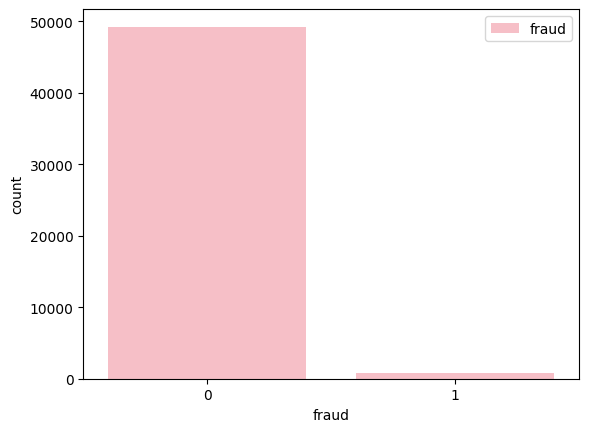

In [31]:
# Distribution of target variable
sns.countplot(x='fraud', data=df,color='lightpink', label= 'fraud')

###  Create separate DataFrames for normal and fraudulent transactions


In [32]:
# Create separate DataFrames for normal and fraudulent transactions
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [33]:
fraud.shape

(774, 17)

In [34]:
# Check the fraud DataFrame
fraud.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
88,2023-08-07,11:16:29 AM,Investment,Paytm,Gopalpur,Himachal Pradesh,Failed,Windows,1,Donations and Devotion,In-store,-30.55,14,44.26,1,2023,Aug
89,2023-07-29,7:26:15 AM,Investment,ICICI UPI,Sonipat,Punjab,Pending,Android,1,More Services,Mobile,-40.54,13,324.50,1,2023,Jul
434,2023-05-23,5:24:39 AM,Bill Payment,Paytm,Orai,Tamil Nadu,Failed,Android,3,More Services,In-store,83.32,22,176.32,1,2023,May
435,2023-07-12,10:50:16 AM,Refund,ICICI UPI,Tumkur,Andhra Pradesh,Failed,Windows,1,Financial services and Taxes,In-store,-74.45,27,337.41,1,2023,Jul
553,2023-12-29,11:19:11 AM,Subscription,Razor Pay,Chinsurah,Madhya Pradesh,Pending,MacOS,2,Purchases,In-store,1.11,24,220.11,1,2023,Dec


In [35]:
fraud.dtypes

Date                            datetime64[ns]
Time                                    object
Transaction_Type                        object
Payment_Gateway                         object
Transaction_City                        object
Transaction_State                       object
Transaction_Status                      object
Device_OS                               object
Transaction_Frequency                    int64
Merchant_Category                       object
Transaction_Channel                     object
Transaction_Amount_Deviation           float64
Days_Since_Last_Transaction              int64
amount                                 float64
fraud                                    int64
Year                                     int32
Month                                   object
dtype: object

In [36]:
fraud['Date'] = fraud['Date'].astype(object)
df['Date'] = df['Date'].astype(object)


In [37]:
fraud.dtypes

Date                             object
Time                             object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

### Analysis for fraud

In [38]:
# Describe the fraud DataFrame
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,774.0,3.972868,7.471934,0.00,1.0000,2.00,3.000,60.00
Transaction_Amount_Deviation,774.0,3.152674,57.815484,-99.56,-46.1650,6.43,52.315,99.66
Days_Since_Last_Transaction,774.0,15.944444,8.127749,1.00,9.0000,16.00,23.000,29.00
amount,774.0,534.986977,878.387571,3.77,147.8275,309.50,546.710,7432.48
fraud,774.0,1.000000,0.000000,1.00,1.0000,1.00,1.000,1.00
Year,774.0,2023.281654,0.450096,2023.00,2023.0000,2023.00,2024.000,2024.00


#### Correlation check for entire dataset

In [39]:
numeric_columns_df = df.select_dtypes(include=['int64','float64'])

In [40]:
corr= numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.005282,0.011400,-0.005520,0.003216
Transaction_Amount_Deviation,0.005282,1.000000,-0.001588,0.004560,0.006764
Days_Since_Last_Transaction,0.011400,-0.001588,1.000000,0.008497,0.013983
amount,-0.005520,0.004560,0.008497,1.000000,0.474991
fraud,0.003216,0.006764,0.013983,0.474991,1.000000


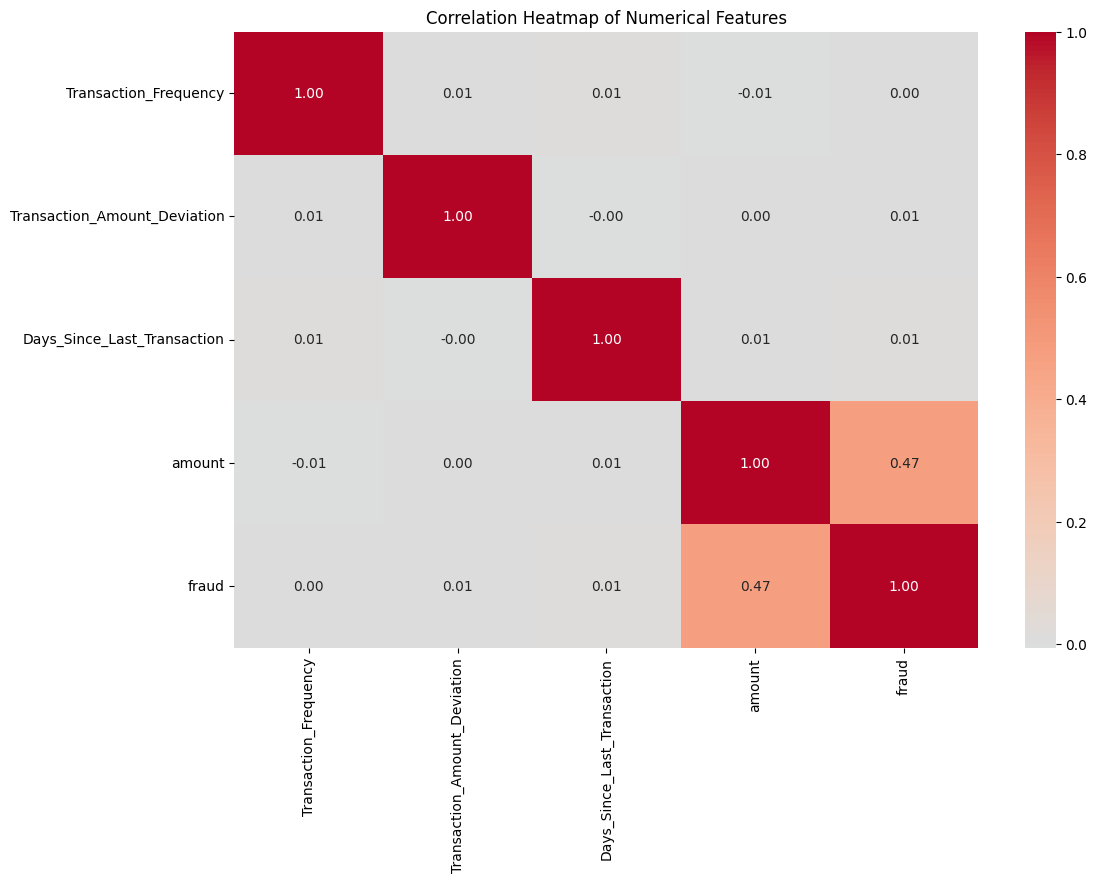

In [41]:
# 1. Correlation Heatmap with Annotations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_df.corr(), 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Correlation check for fraud dataset

In [42]:
numeric_columns = fraud.select_dtypes(include=['int64','float64'])

In [43]:
corr= numeric_columns.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.021117,0.037168,-0.042881,NaN
Transaction_Amount_Deviation,0.021117,1.000000,0.019574,-0.002088,NaN
Days_Since_Last_Transaction,0.037168,0.019574,1.000000,0.019704,NaN
amount,-0.042881,-0.002088,0.019704,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


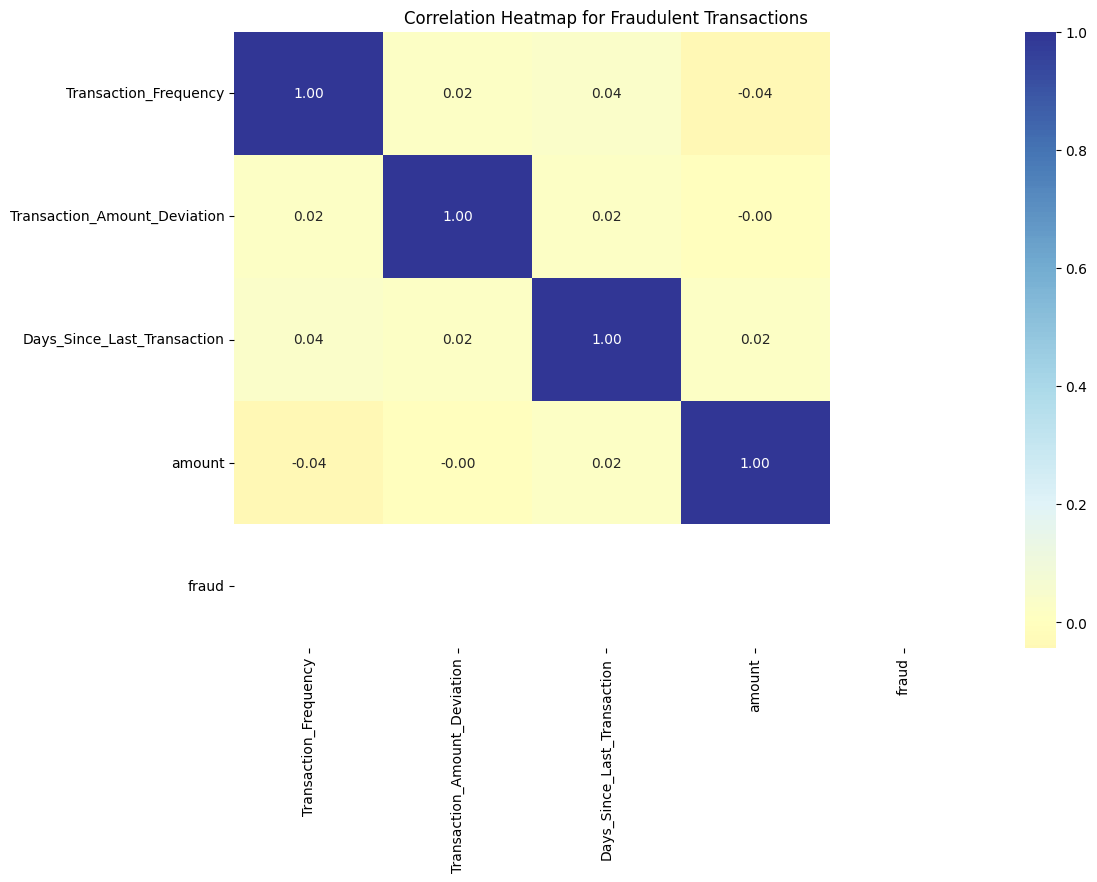

In [44]:
# 1. Basic Correlation Analysis for Fraud Cases
numeric_columns_fraud = fraud.select_dtypes(include=['int64', 'float64'])
corr_fraud = numeric_columns_fraud.corr()

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_fraud, 
            annot=True,
            cmap='RdYlBu',  # Different colormap for fraud
            center=0,
            fmt='.2f')
plt.title('Correlation Heatmap for Fraudulent Transactions')
plt.show()

### Visualizing entire dataset

#### Visualizing different features basis the fraud occurence as a subplot

In [45]:
#sns.pairplot(data=df,hue='fraud',palette='viridis', diag_kind='dist')

In [46]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 1. Count plot for the target variable (fraud)
sns.countplot(x='fraud', data=df, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
axes[0, 0].set_xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
axes[0, 0].set_ylabel('Count')

# 2. Box plot for Transaction Amount by Fraud Status
sns.boxplot(x='fraud', y='amount', data=df, palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount by Fraud Status')
axes[0, 1].set_xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
axes[0, 1].set_ylabel('Transaction Amount')

# 3. Bar plot for average Transaction Frequency by Fraud Status
avg_transaction_frequency = df.groupby('fraud')['Transaction_Frequency'].mean().reset_index()
sns.barplot(x='fraud', y='Transaction_Frequency', data=avg_transaction_frequency, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Average Transaction Frequency by Fraud Status')
axes[1, 0].set_xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
axes[1, 0].set_ylabel('Average Transaction Frequency')

# 4. Count plot for Transaction Type by Fraud Status
sns.countplot(x='Transaction_Type', hue='fraud', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Transaction Type Distribution by Fraud Status')
axes[1, 1].set_xlabel('Transaction Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Fraud Status', loc='upper right', labels=['Non-Fraud', 'Fraud'])
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Correlation heatmap for numerical features
plt.subplot(3, 2, 5)  # Positioning the heatmap in the last subplot
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')

# Adjust layout
plt.tight_layout()
plt.show()'''

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Set the style of seaborn\nsns.set(style="whitegrid")\n\n# Create a figure with multiple subplots\nfig, axes = plt.subplots(3, 2, figsize=(15, 15))\n\n# 1. Count plot for the target variable (fraud)\nsns.countplot(x=\'fraud\', data=df, palette=\'pastel\', ax=axes[0, 0])\naxes[0, 0].set_title(\'Distribution of Fraudulent vs Non-Fraudulent Transactions\')\naxes[0, 0].set_xlabel(\'Fraud Status (0 = Non-Fraud, 1 = Fraud)\')\naxes[0, 0].set_ylabel(\'Count\')\n\n# 2. Box plot for Transaction Amount by Fraud Status\nsns.boxplot(x=\'fraud\', y=\'amount\', data=df, palette=\'pastel\', ax=axes[0, 1])\naxes[0, 1].set_title(\'Transaction Amount by Fraud Status\')\naxes[0, 1].set_xlabel(\'Fraud Status (0 = Non-Fraud, 1 = Fraud)\')\naxes[0, 1].set_ylabel(\'Transaction Amount\')\n\n# 3. Bar plot for average Transaction Frequency by Fraud Status\navg_transaction_frequency = df.groupby(\'fraud\')[\'Transaction_Frequency\'].mean().reset_index()

### Visualizing Fraud Data

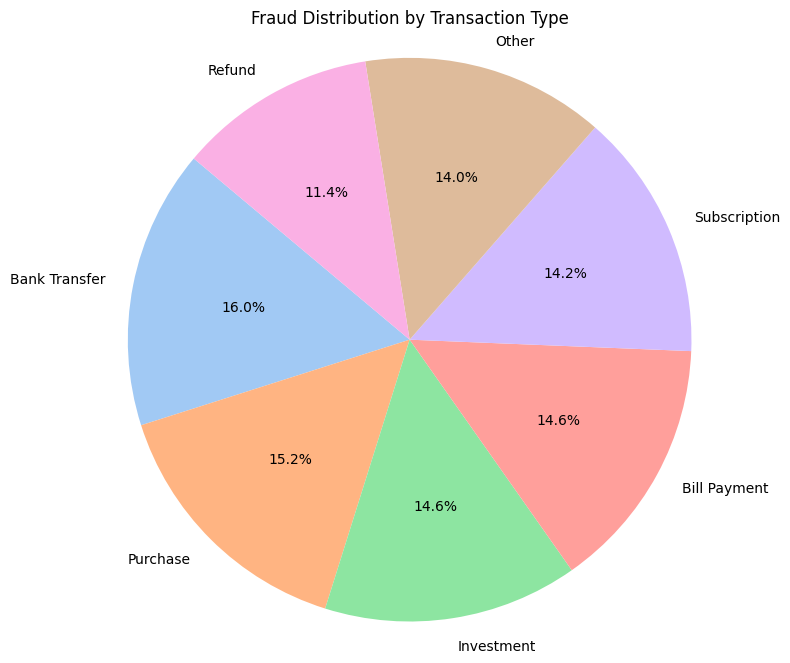

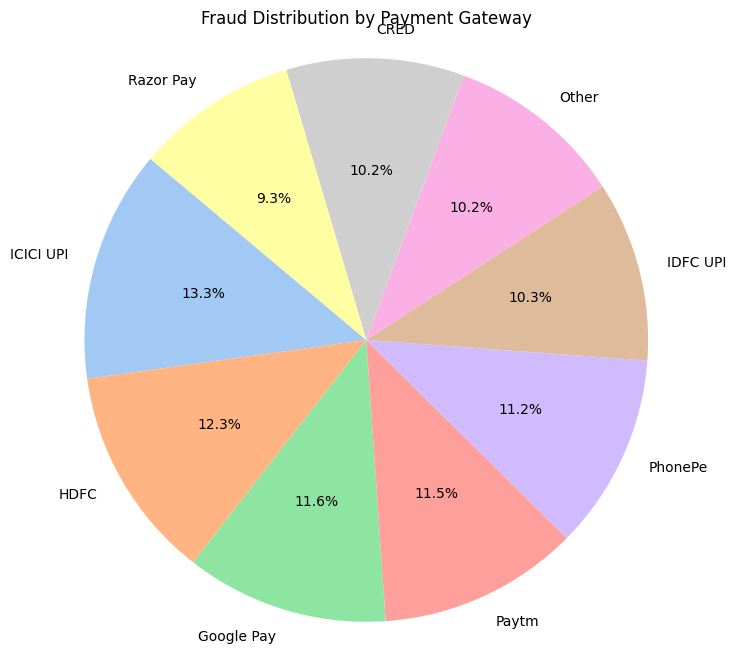

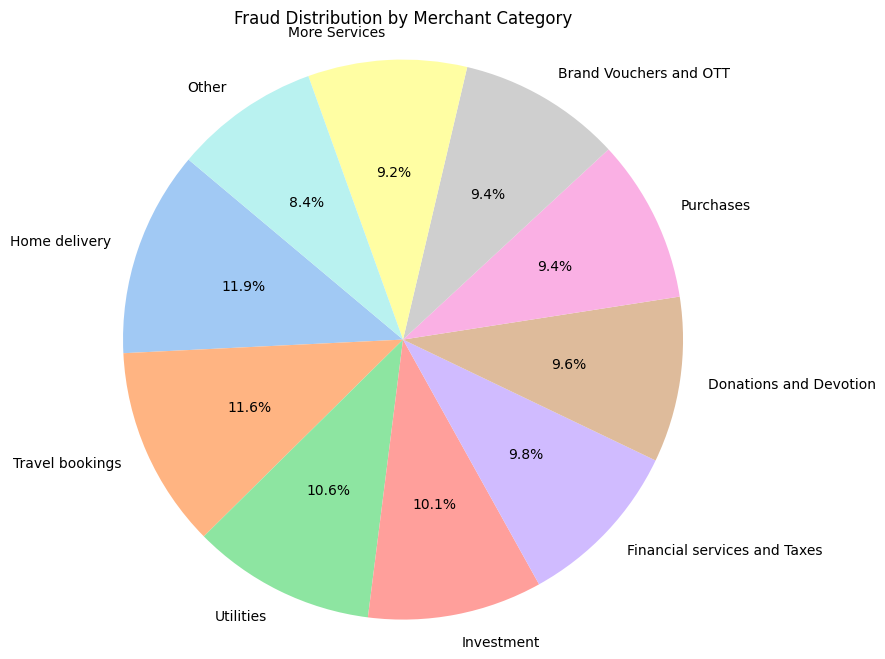

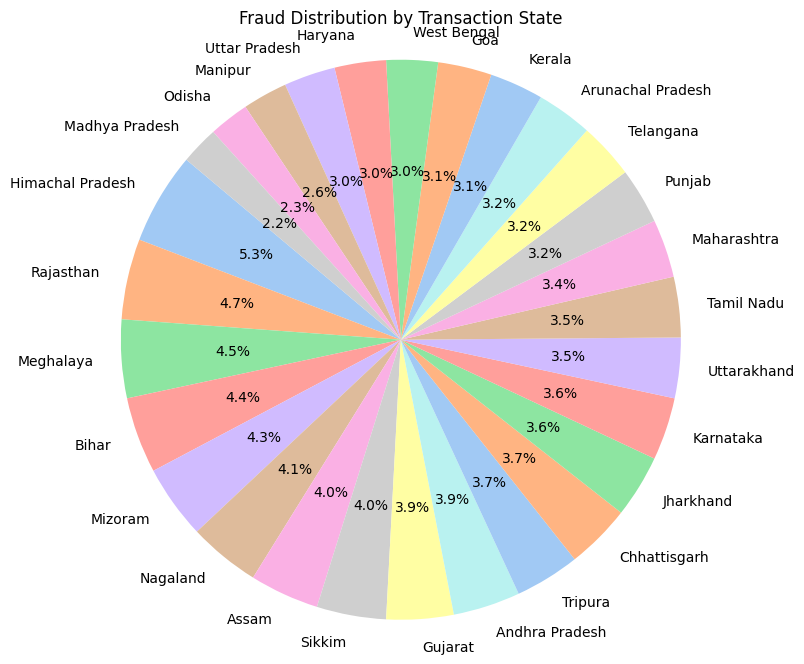

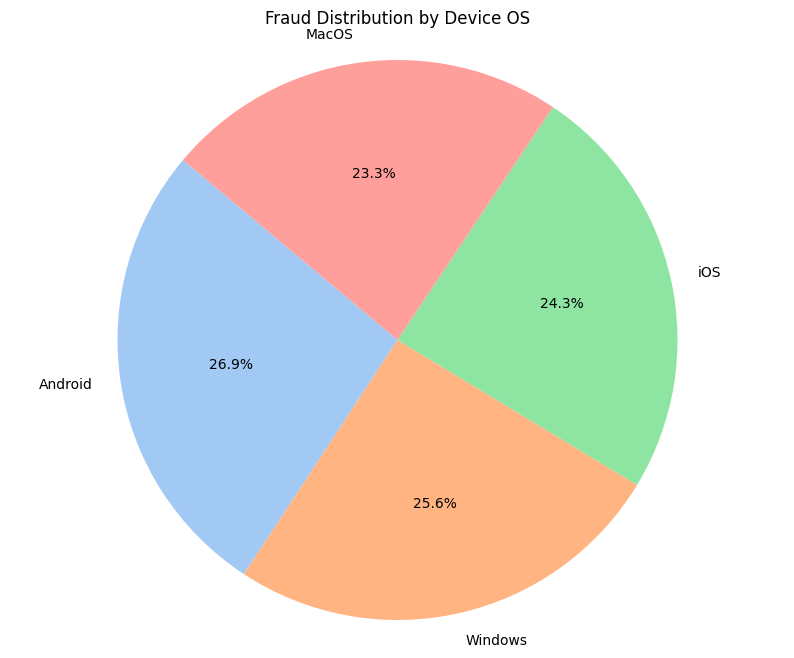

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Fraud distribution by Transaction Type
plt.figure(figsize=(8, 8))
fraud_counts = fraud['Transaction_Type'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fraud Distribution by Transaction Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Plot 2: Fraud distribution by Payment Gateway
plt.figure(figsize=(8, 8))
payment_gateway_counts = fraud['Payment_Gateway'].value_counts()
plt.pie(payment_gateway_counts, labels=payment_gateway_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fraud Distribution by Payment Gateway')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


# Plot 3: Fraud distribution by Merchant Category
plt.figure(figsize=(10, 8))
merchant_category_counts = fraud['Merchant_Category'].value_counts()
plt.pie(merchant_category_counts, labels=merchant_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fraud Distribution by Merchant Category')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


# Plot 4: Relationship between Transaction_State and Fraud using bar plot
plt.figure(figsize=(10, 8))
transaction_state_counts = fraud['Transaction_State'].value_counts()
plt.pie(transaction_state_counts, labels=transaction_state_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fraud Distribution by Transaction State')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


# Plot 5: Relationship between Device_OS and Fraud using bar plot
plt.figure(figsize=(10, 8))
device_os_counts = fraud['Device_OS'].value_counts()
plt.pie(device_os_counts, labels=device_os_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fraud Distribution by Device OS')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


In [48]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 88 to 49953
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          774 non-null    object 
 1   Time                          774 non-null    object 
 2   Transaction_Type              774 non-null    object 
 3   Payment_Gateway               774 non-null    object 
 4   Transaction_City              774 non-null    object 
 5   Transaction_State             774 non-null    object 
 6   Transaction_Status            774 non-null    object 
 7   Device_OS                     774 non-null    object 
 8   Transaction_Frequency         774 non-null    int64  
 9   Merchant_Category             774 non-null    object 
 10  Transaction_Channel           774 non-null    object 
 11  Transaction_Amount_Deviation  774 non-null    float64
 12  Days_Since_Last_Transaction   774 non-null    int64  
 13  amount 

### Statistical analysis for feature importance :

In [49]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_analysis(df, target_variable, alpha=0.05):
    categorical_vars = df.select_dtypes(include=['object'])
    results = []

    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(df[cat_var], df[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        results.append([cat_var, chi2, p, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = chi_square_analysis(df, 'fraud')
results_df


,Column,Chi-square statistic,p-value,Comment,Recommendation
0,Date,331.327063,0.903126,No significant association with fraud,Can be removed
1,Time,28251.839772,1.000000,No significant association with fraud,Can be removed
2,Transaction_Type,6.939491,0.326479,No significant association with fraud,Can be removed
3,Payment_Gateway,8.522469,0.384165,No significant association with fraud,Can be removed
4,Transaction_City,344.186271,0.124028,No significant association with fraud,Can be removed
5,Transaction_State,27.170556,0.454622,No significant association with fraud,Can be removed
6,Transaction_Status,0.478872,0.787071,No significant association with fraud,Can be removed
7,Device_OS,2.041919,0.563752,No significant association with fraud,Can be removed
8,Merchant_Category,8.413997,0.493023,No significant association with fraud,Can be removed
9,Transaction_Channel,0.918124,0.631876,No significant association with fraud,Can be removed


### Dropping unnecessary columns from entire dataset

In [50]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Time', 'Date', 'Device_OS', 'Transaction_Channel', 'Transaction_City']

df.drop(columns=columns_to_drop, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_State  50000 non-null  object 
 3   Merchant_Category  50000 non-null  object 
 4   amount             50000 non-null  float64
 5   fraud              50000 non-null  int64  
 6   Year               50000 non-null  int32  
 7   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 2.9+ MB


### ANOVA-test:
    - Scenario: You can use a ANOVA-test to to determine whether there is a significant difference between fraud and non-fraud transactions.

In [52]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64','int32'])
    results = []

    for num_var in numerical_vars:
        groups = df.groupby(target_variable)[num_var].apply(list)
        f_statistic, p_value = f_oneway(*groups)

        if p_value < alpha:
            comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = ""
        else:
            comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = "Can be removed"

        results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = anova_analysis(df, 'fraud')
results_df


,Column,F-statistic,p-value,Comment,Recommendation
0,amount,1.456688e+04,0.000000,Significant difference in amount between fraud...,
1,fraud,inf,0.000000,Significant difference in fraud between fraud ...,
2,Year,2.163681e-02,0.883058,No significant difference in Year between frau...,Can be removed


In [53]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

### Encoding and scaling

In [54]:
data = df.copy()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_State  50000 non-null  object 
 3   Merchant_Category  50000 non-null  object 
 4   amount             50000 non-null  float64
 5   fraud              50000 non-null  int64  
 6   Year               50000 non-null  int32  
 7   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 2.9+ MB


In [56]:
# Converting Year column to object
data['Year'] = data['Year'].astype('object')

In [57]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [59]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

In [60]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,4,0,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39,0,0,8,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,26,0,1,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,17,0,0,11,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [61]:
data.dtypes

amount                                            int32
fraud                                             int32
Year                                              int32
Month                                             int32
Transaction_Type_Bill Payment                     int32
Transaction_Type_Investment                       int32
Transaction_Type_Other                            int32
Transaction_Type_Purchase                         int32
Transaction_Type_Refund                           int32
Transaction_Type_Subscription                     int32
Payment_Gateway_Google Pay                        int32
Payment_Gateway_HDFC                              int32
Payment_Gateway_ICICI UPI                         int32
Payment_Gateway_IDFC UPI                          int32
Payment_Gateway_Other                             int32
Payment_Gateway_Paytm                             int32
Payment_Gateway_PhonePe                           int32
Payment_Gateway_Razor Pay                       

In [62]:
data.shape

(50000, 54)

## To improve the computational effeciency, taking 50% of the entire data for model building and testing keeping the ratio intact

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into 'fraud' and 'non-fraud' classes
fraud_data = data[data['fraud'] == 1]
non_fraud_data = data[data['fraud'] == 0]

# Sample each class separately while maintaining proportions
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])



### Model Building

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (17500, 53)
Test features shape: (7500, 53)
Training target shape: (17500,)
Test target shape: (7500,)


### Model performance before data balancing. i.e, with RAW data

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

# Assuming you have already loaded your data into X and y

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Hard predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Probabilities

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Using probabilities
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Specificity': specificity
    }

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Train the model
    metrics = evaluate_model(model, X_test, y_test)  # Evaluate the model
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:
Logistic Regression:
Naive Bayes:
AdaBoost:
Bagging:
Extra Trees:
CatBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Specificity
0,DecisionTreeClassifier,0.987733,0.601695,0.612069,0.606838,0.802852,0.993635
1,RandomForestClassifier,0.992933,0.862069,0.646552,0.738916,0.937480,0.998375
2,GradientBoostingClassifier,0.991733,0.806818,0.612069,0.696078,0.953505,0.997698
3,XGBClassifier,0.991600,0.791209,0.620690,0.695652,0.955620,0.997427
4,LogisticRegression,0.992533,0.916667,0.568966,0.702128,0.954850,0.999187
5,GaussianNB,0.986800,0.554140,0.750000,0.637363,0.883679,0.990520
6,AdaBoostClassifier,0.991600,0.804598,0.603448,0.689655,0.953483,0.997698
7,BaggingClassifier,0.992533,0.840909,0.637931,0.725490,0.895593,0.998104
8,ExtraTreesClassifier,0.988000,0.842105,0.275862,0.415584,0.931150,0.999187
9,CatBoostClassifier,0.992133,0.813187,0.637931,0.714976,0.954133,0.997698


## Balancing the data : There are two well-known techniques to deal with highly imbalanced datasets:
    - Undersampling technique
    - Oversampling(SMOTE)
    - We attempted the undersampling. However, due to its poor performance, we moved on to oversampling technique(SMOTE)

### Oversampling (SMOTE)

In [66]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [67]:
X.shape

(25000, 53)

In [68]:
y.shape

(25000,)

In [69]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [70]:
!python.exe -m pip install --upgrade pip

In [71]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)
print(y_res.value_counts())


fraud
1    24613
0    24613
Name: count, dtype: int64


In [72]:
print("X_res shape:", X_res.shape)
print("\nX_res columns:")
print(X_res.columns.tolist())


X_res shape: (49226, 53)

X_res columns:
['amount', 'Year', 'Month', 'Transaction_Type_Bill Payment', 'Transaction_Type_Investment', 'Transaction_Type_Other', 'Transaction_Type_Purchase', 'Transaction_Type_Refund', 'Transaction_Type_Subscription', 'Payment_Gateway_Google Pay', 'Payment_Gateway_HDFC', 'Payment_Gateway_ICICI UPI', 'Payment_Gateway_IDFC UPI', 'Payment_Gateway_Other', 'Payment_Gateway_Paytm', 'Payment_Gateway_PhonePe', 'Payment_Gateway_Razor Pay', 'Transaction_State_Arunachal Pradesh', 'Transaction_State_Assam', 'Transaction_State_Bihar', 'Transaction_State_Chhattisgarh', 'Transaction_State_Goa', 'Transaction_State_Gujarat', 'Transaction_State_Haryana', 'Transaction_State_Himachal Pradesh', 'Transaction_State_Jharkhand', 'Transaction_State_Karnataka', 'Transaction_State_Kerala', 'Transaction_State_Madhya Pradesh', 'Transaction_State_Maharashtra', 'Transaction_State_Manipur', 'Transaction_State_Meghalaya', 'Transaction_State_Mizoram', 'Transaction_State_Nagaland', 'Transact

### Training 70% of the Dataset

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# Define a function to evaluate a model and return metrics for training data
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Hard predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Probabilities

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Using probabilities

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Specificity': specificity
    }

# Split the balanced data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=20),  # Reduced depth & estimators
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=50),  # Lower learning rate & depth
    "XGBoost": XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=800),
    # New models with their best parameters
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),  # Add high variance smoothing
    "AdaBoost": AdaBoostClassifier(n_estimators=10, learning_rate=0.01),  # Fewer estimators and low learning rate
    "Bagging": BaggingClassifier(n_estimators=100, max_samples=0.7),
    "Extra Trees": ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=20),  # Low depth and min samples
    "CatBoost": CatBoostClassifier(iterations=2000, learning_rate=0.03, depth=8, l2_leaf_reg=3, border_count=128, verbose=False)
}

results = []

# Model Training and Evaluation on Training Data
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Fit the model on training data
    metrics_training = evaluate_model(model, X_train, y_train)  # Evaluate on training data
    results.append(metrics_training)

# Create a DataFrame from the training results
df_results_training = pd.DataFrame(results)

# Display the DataFrame for training results
print("Training Data Results:")
df_results_training


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training Logistic Regression...
Training Naive Bayes...
Training AdaBoost...
Training Bagging...
Training Extra Trees...
Training CatBoost...
Training Data Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Specificity
0,DecisionTreeClassifier,0.996285,0.997324,0.995241,0.996281,0.999965,0.997330
1,RandomForestClassifier,0.947153,0.983980,0.909107,0.945063,0.995897,0.985199
2,GradientBoostingClassifier,0.935167,0.965539,0.902548,0.932981,0.982808,0.967787
3,XGBClassifier,0.999797,0.999768,0.999826,0.999797,1.000000,0.999768
4,LogisticRegression,0.991729,0.993649,0.989785,0.991713,0.998527,0.993673
5,GaussianNB,0.842098,0.992315,0.689535,0.813671,0.944339,0.994660
6,AdaBoostClassifier,0.922340,0.954412,0.887051,0.919499,0.926594,0.957630
7,BaggingClassifier,0.999245,0.999419,0.999071,0.999245,0.999998,0.999420
8,ExtraTreesClassifier,0.899936,0.875320,0.932730,0.903113,0.962623,0.867143
9,CatBoostClassifier,0.999158,0.999419,0.998897,0.999158,0.999984,0.999420


### Confusion Matrix for Training Dataset

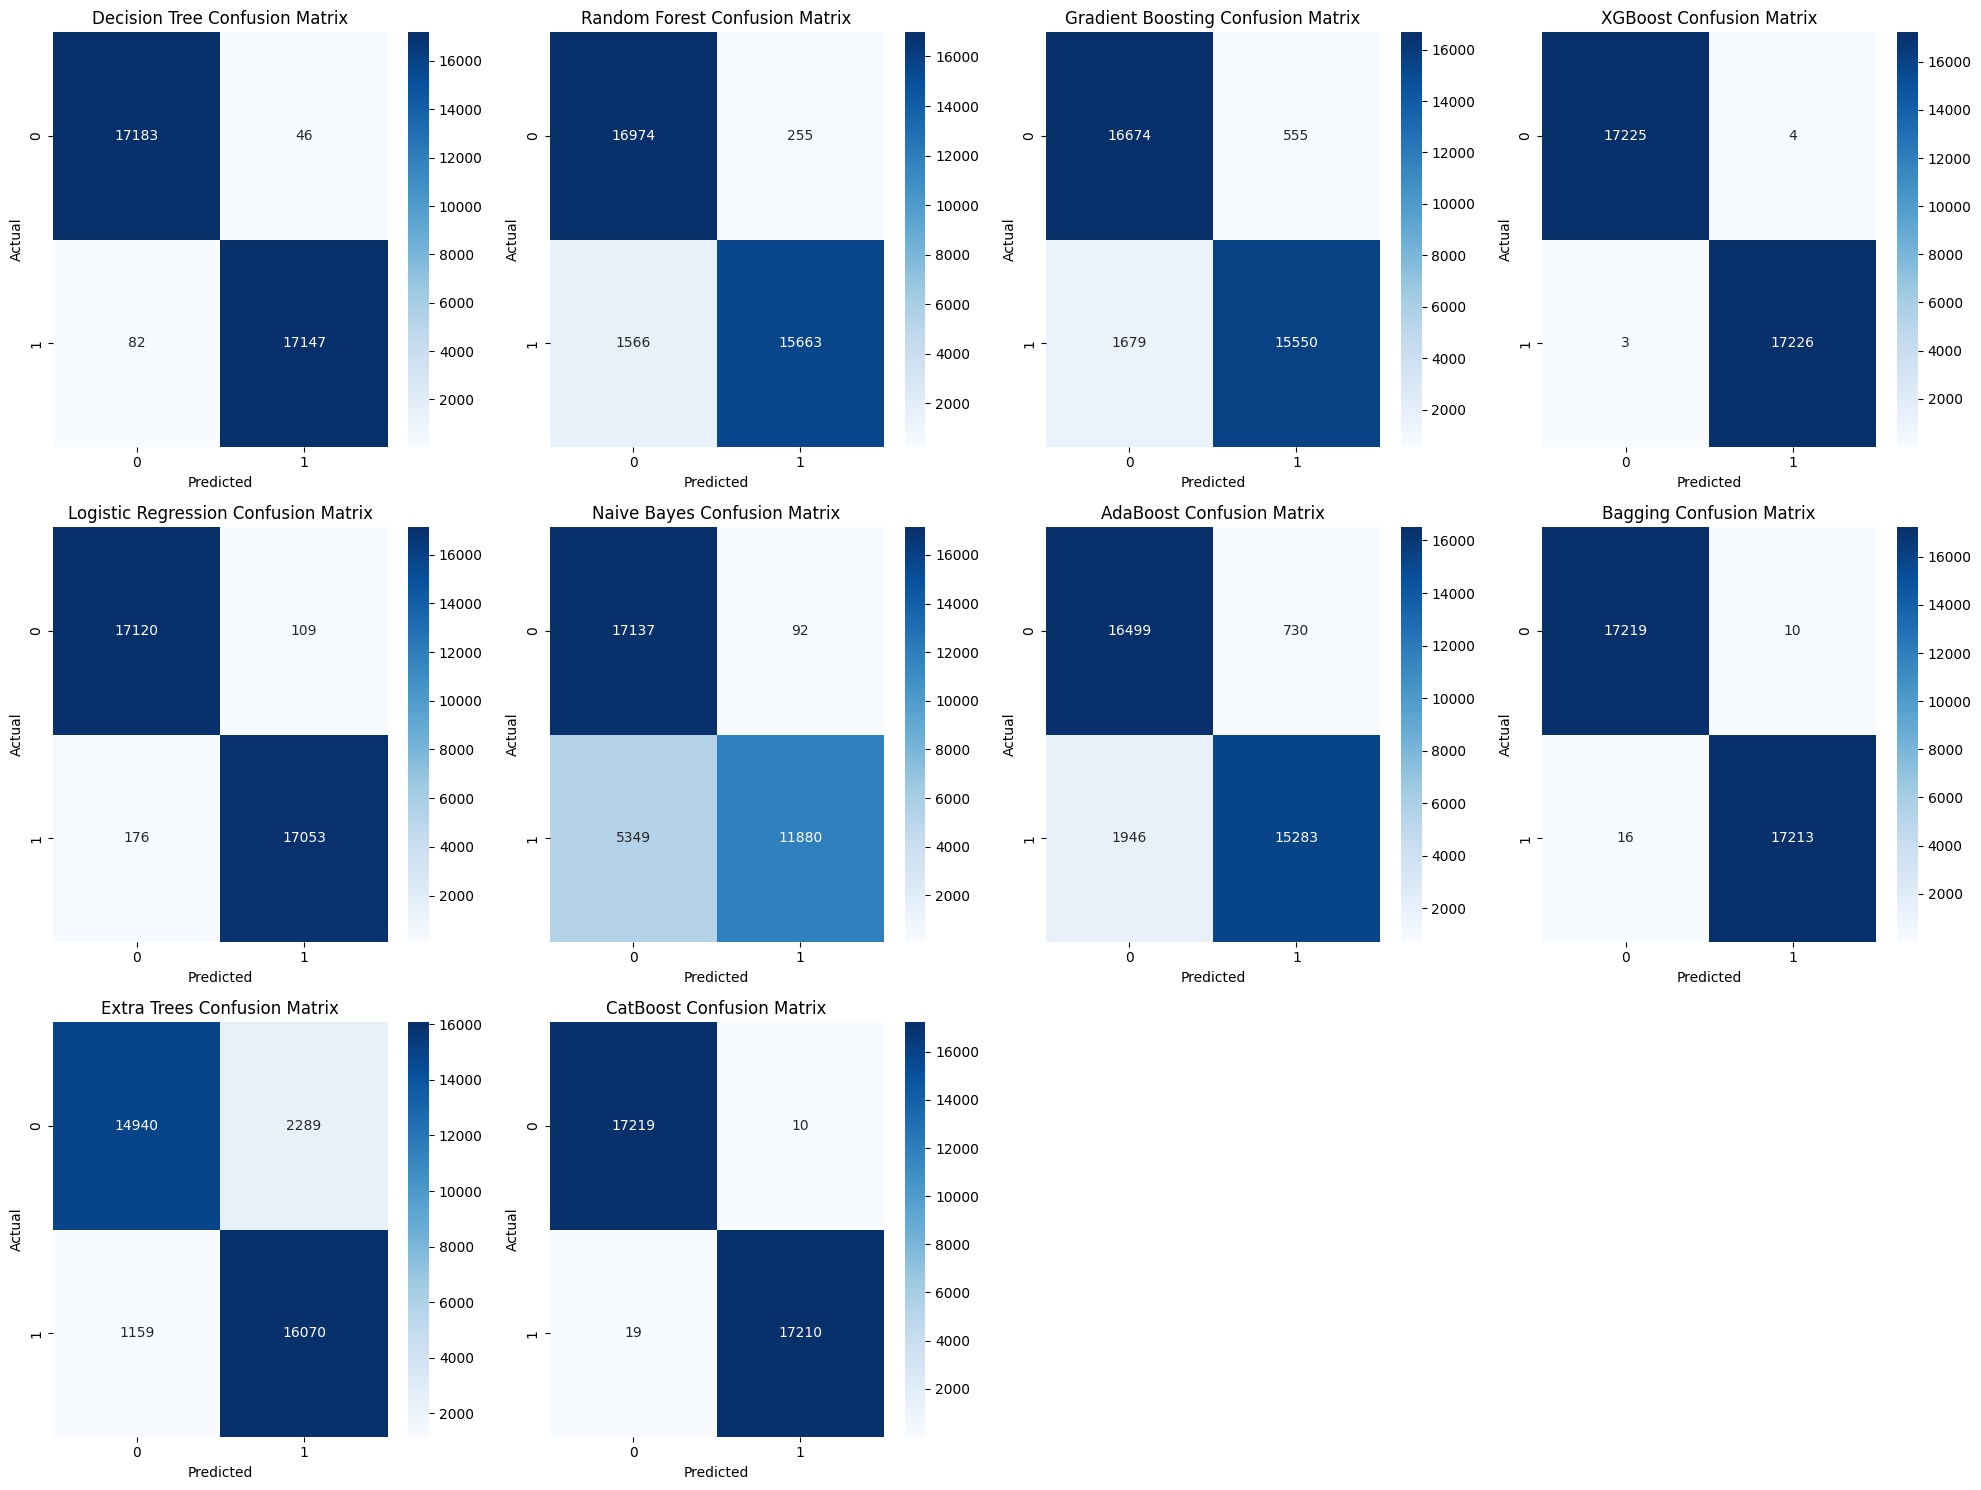

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrices for all models in subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    # Generate confusion matrix
    y_pred_train = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_train)

    # Plot confusion matrix using heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{model_name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Adjust layout and hide unused subplots
for ax in axes[len(models):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### RoC Curve

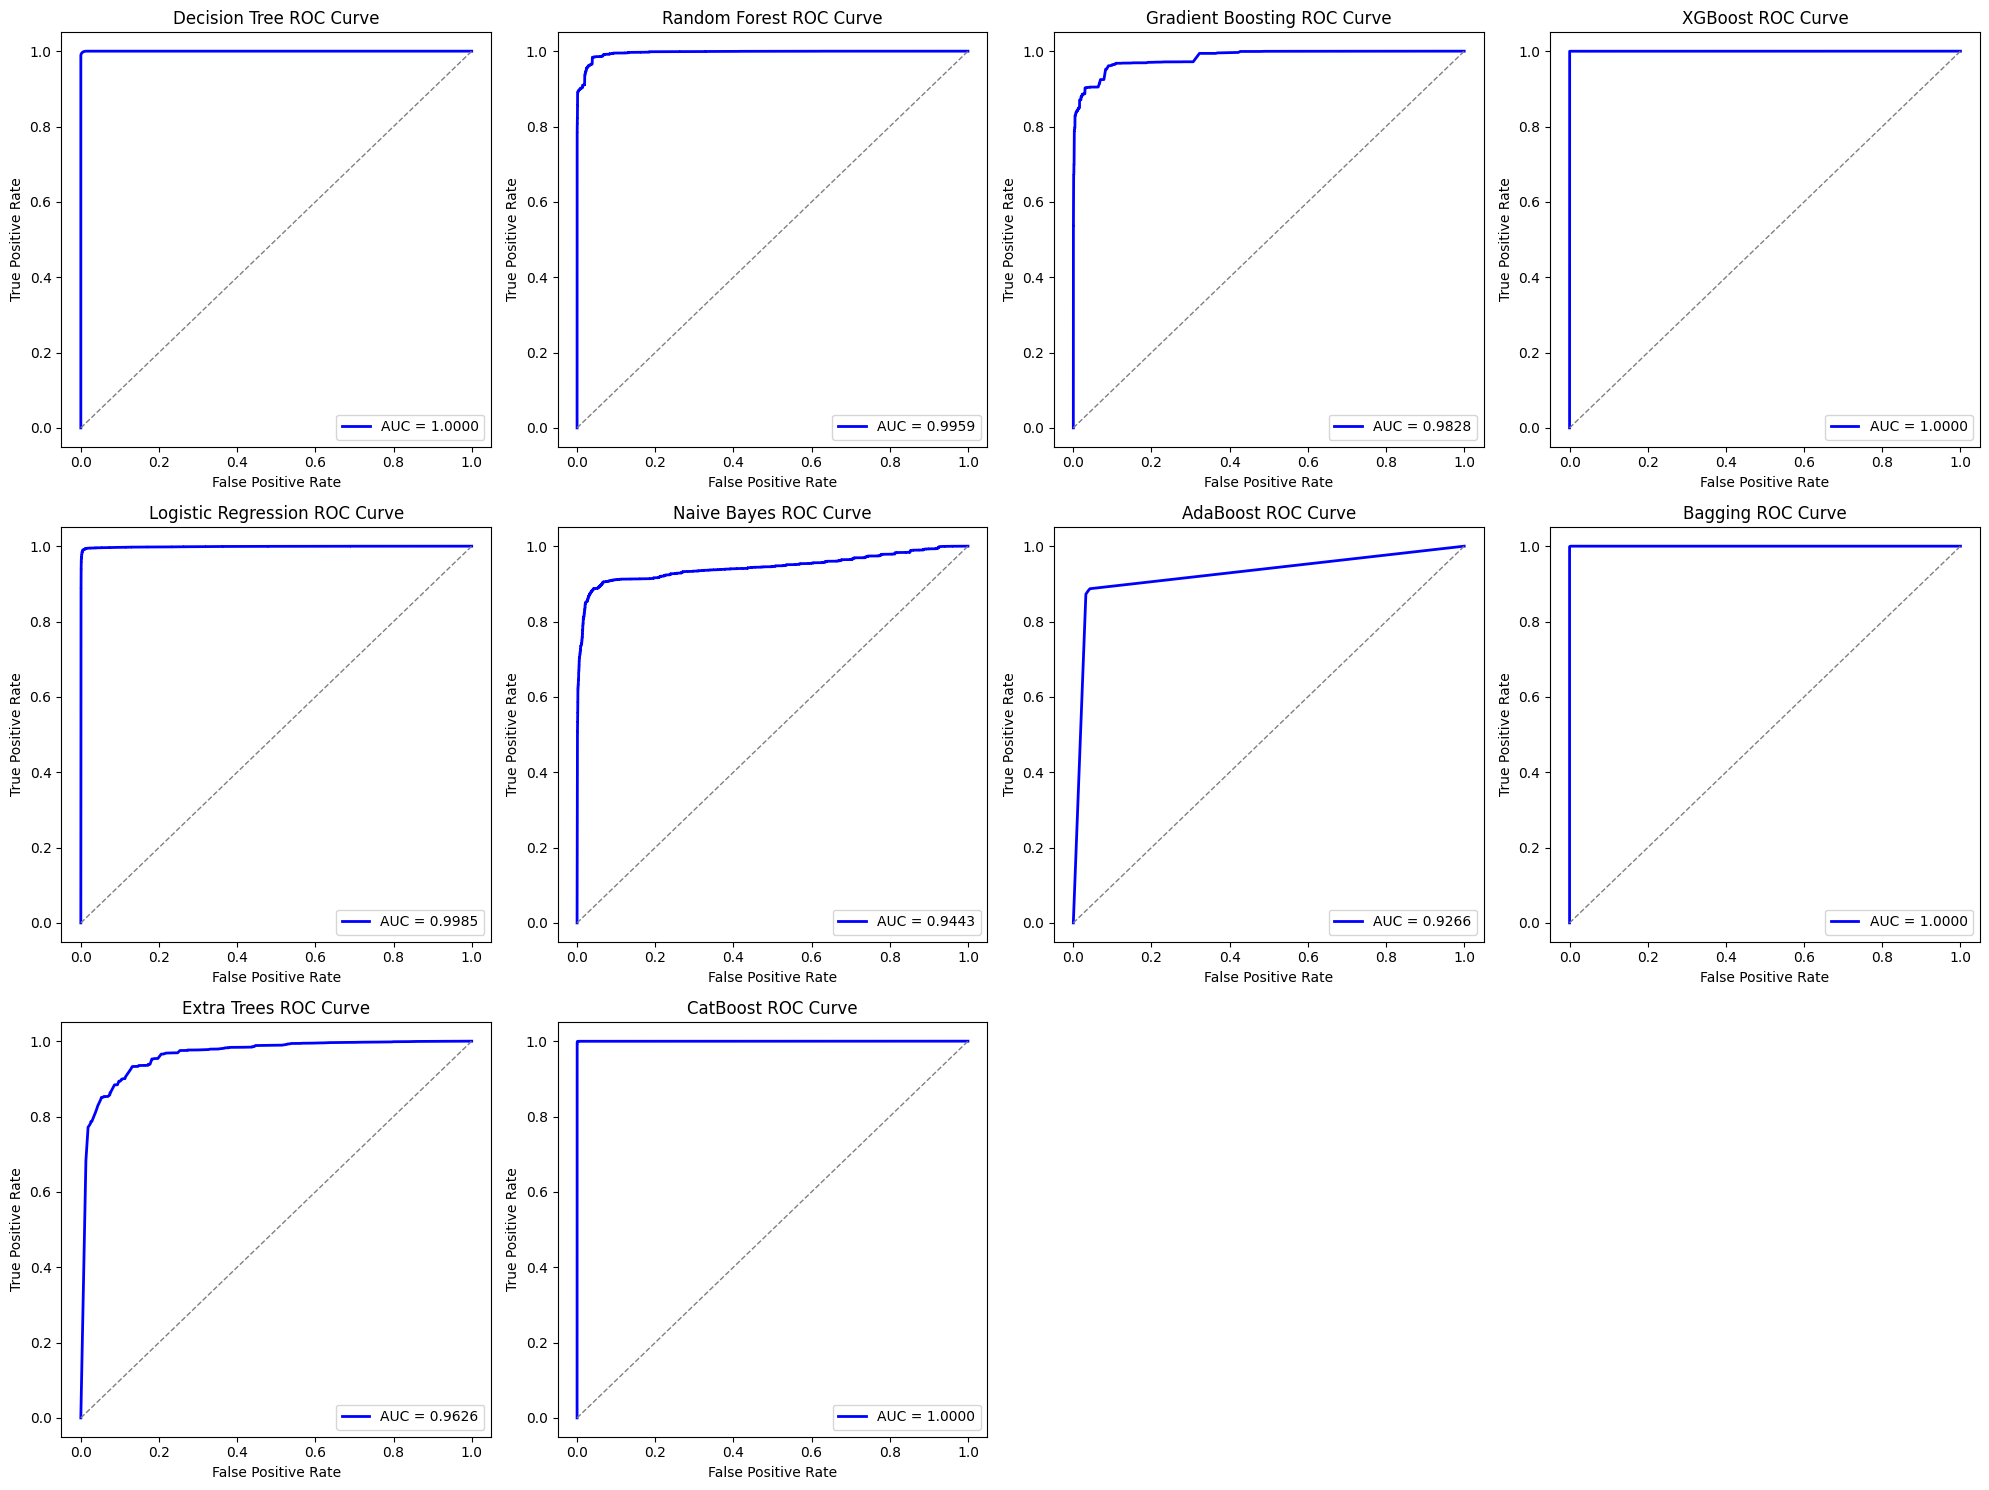

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for all models
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    # Get probabilities for the positive class
    y_pred_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)

    # Compute FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    axes[idx].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    axes[idx].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line for random guess
    axes[idx].set_title(f'{model_name} ROC Curve')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].legend(loc='lower right')

# Hide unused subplots
for ax in axes[len(models):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


## Testing 30% of Dataset

## XGBoost is known for its high performance and effeciency, and this model demonstrates excellent results across all the metrics.

### Hyper Parameter Tuning :  using RandomizedSearch

In [76]:
# from sklearn.model_selection import GridSearchCV

# # Define a narrower hyperparameter grid for each model
# param_grid = {
#     'Decision Tree': {'max_depth': [10, 20, 50],
#                       'min_samples_split': [2, 5, 10]},
#     'Random Forest': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 20],
#                       'min_samples_split': [2, 5]},
#     'Gradient Boosting': {'n_estimators': [50, 100],
#                           'learning_rate': [0.05, 0.1],
#                           'max_depth': [3, 5]},
#     'XGBoost': {'n_estimators': [50, 100],
#                 'learning_rate': [0.05, 0.1],
#                 'max_depth': [3, 5]}
# }

# # Perform hyperparameter tuning for each model
# best_params = {}
# for model_name, model in models.items():
#     grid_search = GridSearchCV(estimator=model,
#                                param_grid=param_grid[model_name],
#                                scoring='f1',
#                                cv=5,
#                                verbose=2)
#     grid_search.fit(X_train, y_train)
#     best_params[model_name] = grid_search.best_params_

# # Print best hyperparameters for each model
# for model_name, params in best_params.items():
#     print(f"Best hyperparameters for {model_name}: {params}")



In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Probabilities

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Compute confusion matrix for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Specificity': specificity  # Added specificity
    }

# Split the balanced data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Define models with best hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=20),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=50),
    "XGBoost": XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=800),
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),
    "AdaBoost": AdaBoostClassifier(n_estimators=10, learning_rate=0.01),
    "Bagging": BaggingClassifier(n_estimators=100, max_samples=0.7),
    "Extra Trees": ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=20),
    "CatBoost": CatBoostClassifier(iterations=2000, learning_rate=0.03, depth=8, l2_leaf_reg=3, border_count=128, verbose=False)
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results  # Print results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:
Logistic Regression:
Naive Bayes:
AdaBoost:
Bagging:
Extra Trees:
CatBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Specificity
0,DecisionTreeClassifier,0.987676,0.983745,0.991739,0.987726,0.992397,0.983613
1,RandomForestClassifier,0.944475,0.981514,0.906013,0.942254,0.995423,0.982936
2,GradientBoostingClassifier,0.936823,0.965911,0.905607,0.934787,0.983242,0.968039
3,XGBClassifier,0.995395,0.995664,0.995125,0.995394,0.999432,0.995666
4,LogisticRegression,0.991468,0.994414,0.988489,0.991443,0.998157,0.994447
5,GaussianNB,0.842362,0.993943,0.688922,0.813790,0.946665,0.995802
6,AdaBoostClassifier,0.924160,0.954968,0.890303,0.921503,0.927681,0.958017
7,BaggingClassifier,0.989030,0.984698,0.993499,0.989079,0.999442,0.984561
8,ExtraTreesClassifier,0.845951,0.808105,0.907367,0.854864,0.941428,0.784534
9,CatBoostClassifier,0.994989,0.994989,0.994989,0.994989,0.999158,0.994989


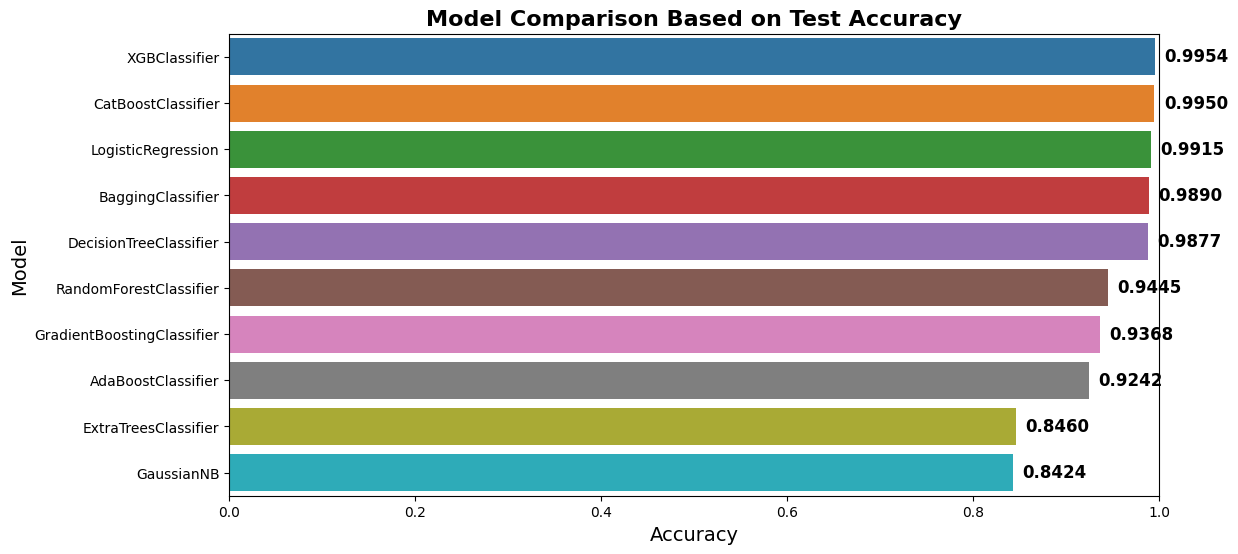

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame and sort by accuracy
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create a colorful barplot using the 'tab10' palette
colors = sns.color_palette("tab10", len(df_results))
ax = sns.barplot(x="Accuracy", y="Model", data=df_results, palette=colors)

# Add accuracy values next to each bar
for index, value in enumerate(df_results["Accuracy"]):
    plt.text(value + 0.01, index, f"{value:.4f}", va="center", fontsize=12, fontweight="bold")

# Add labels and title
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.title("Model Comparison Based on Test Accuracy", fontsize=16, fontweight="bold")
plt.xlim(0, 1)  # Ensure accuracy scale is between 0 and 1

# Show the plot
plt.show()


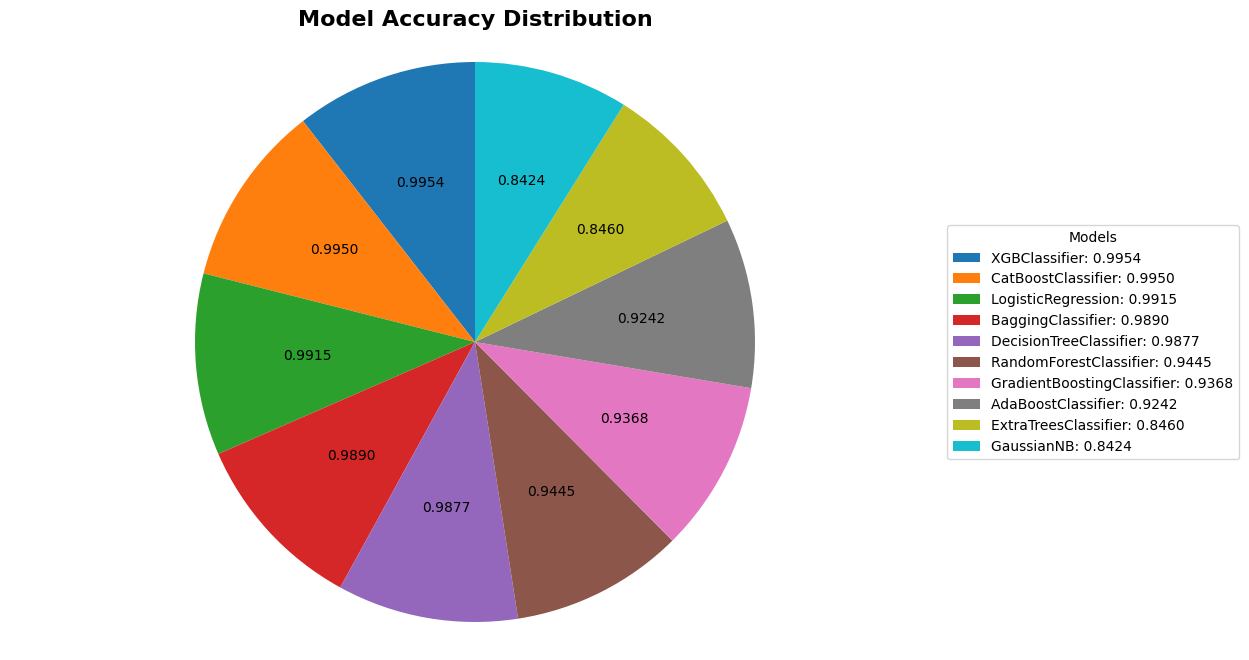

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results is already created and sorted by accuracy descending
models = df_results["Model"]
accuracies = df_results["Accuracy"]

# Generate colors using the 'tab10' palette
colors = sns.color_palette("tab10", len(df_results))

# Set explode to highlight the model with the highest accuracy
explode = [0] * len(df_results)  # No slice will be pushed outward

# Define a function to display actual accuracy values on the pie slices
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = (pct / 100.0) * total
        return '{:.4f}'.format(val)
    return my_format

# Create the pie chart
plt.figure(figsize=(12, 8))  # Set figure size to accommodate the chart and legend
plt.pie(
    accuracies,
    autopct=autopct_format(accuracies),  # Display accuracy values on slices
    colors=colors,                       # Apply the color palette
    explode=explode,                     # Highlight the top model
    startangle=90                        # Start the pie chart from the top
)

# Add a legend with model names and their accuracies
plt.legend(
    labels=[f"{model}: {accuracy:.4f}" for model, accuracy in zip(models, accuracies)],
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Position the legend to the right of the chart
    title="Models"            # Add a title to the legend
)

# Add a title to the pie chart
plt.title("Model Accuracy Distribution", fontsize=16, fontweight="bold")

# Ensure the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()

### Confusion Matrix

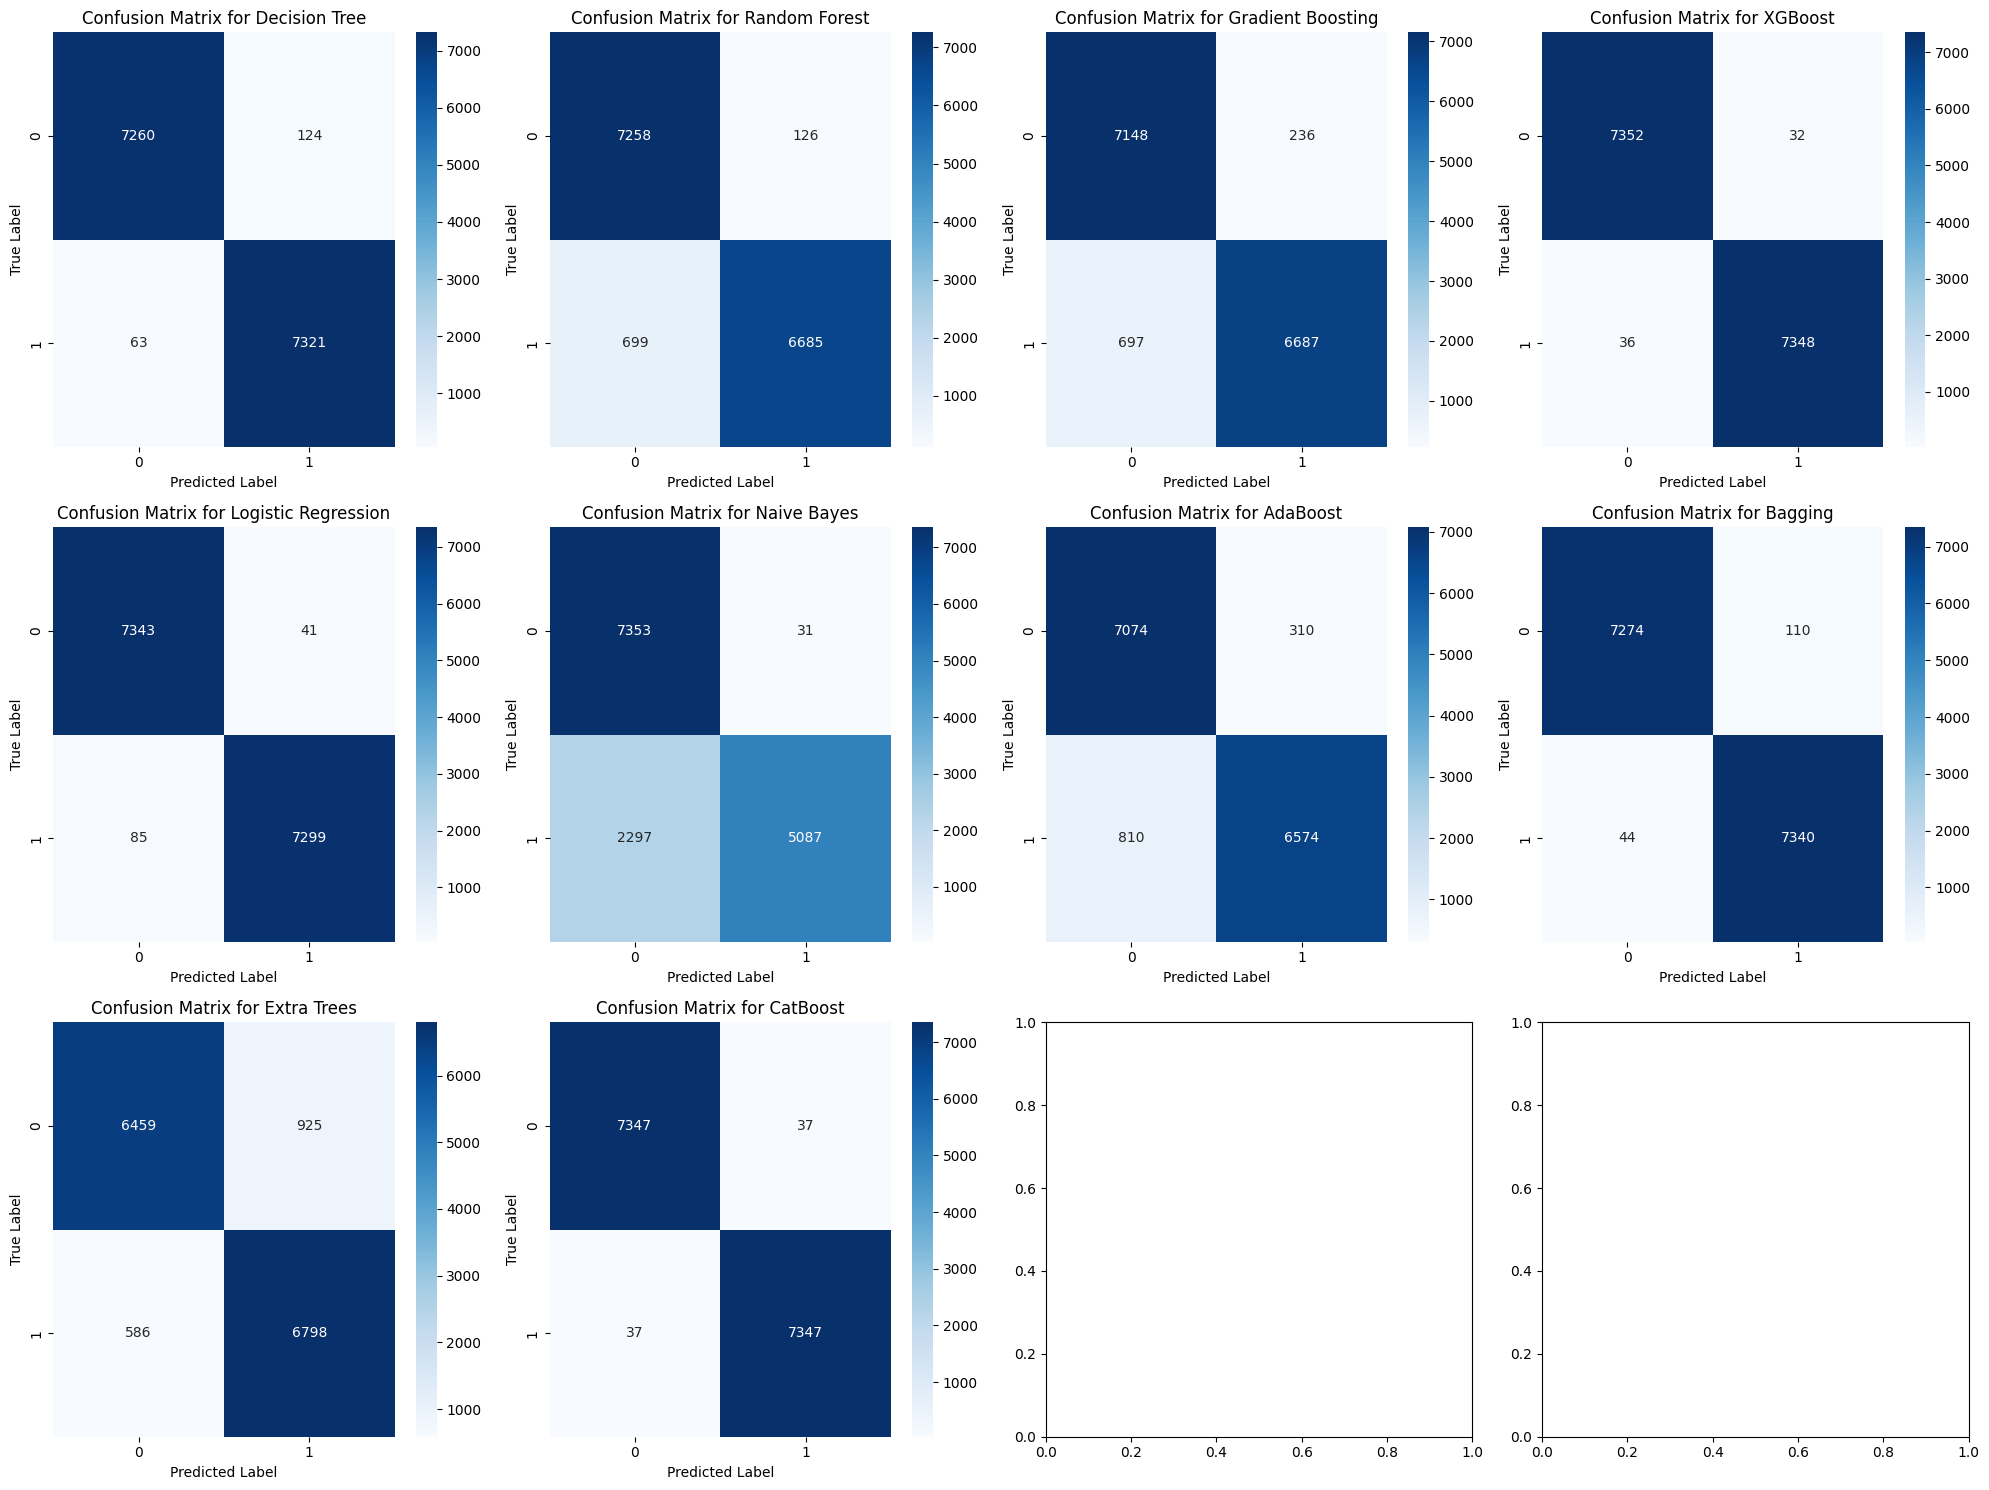

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Define models properly
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=20),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=50),
    "XGBoost": XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=800),
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Naive Bayes": GaussianNB(var_smoothing=1e-2),
    "AdaBoost": AdaBoostClassifier(n_estimators=10, learning_rate=0.01),
    "Bagging": BaggingClassifier(n_estimators=100, max_samples=0.7),
    "Extra Trees": ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=20),
    "CatBoost": CatBoostClassifier(iterations=2000, learning_rate=0.03, depth=8, l2_leaf_reg=3, border_count=128, verbose=False)
}


# Train models before predicting
for model_name, model in models.items():
    model.fit(X_train, y_train)  

# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)  # Now this should work!

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot it
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


### ROC Curve

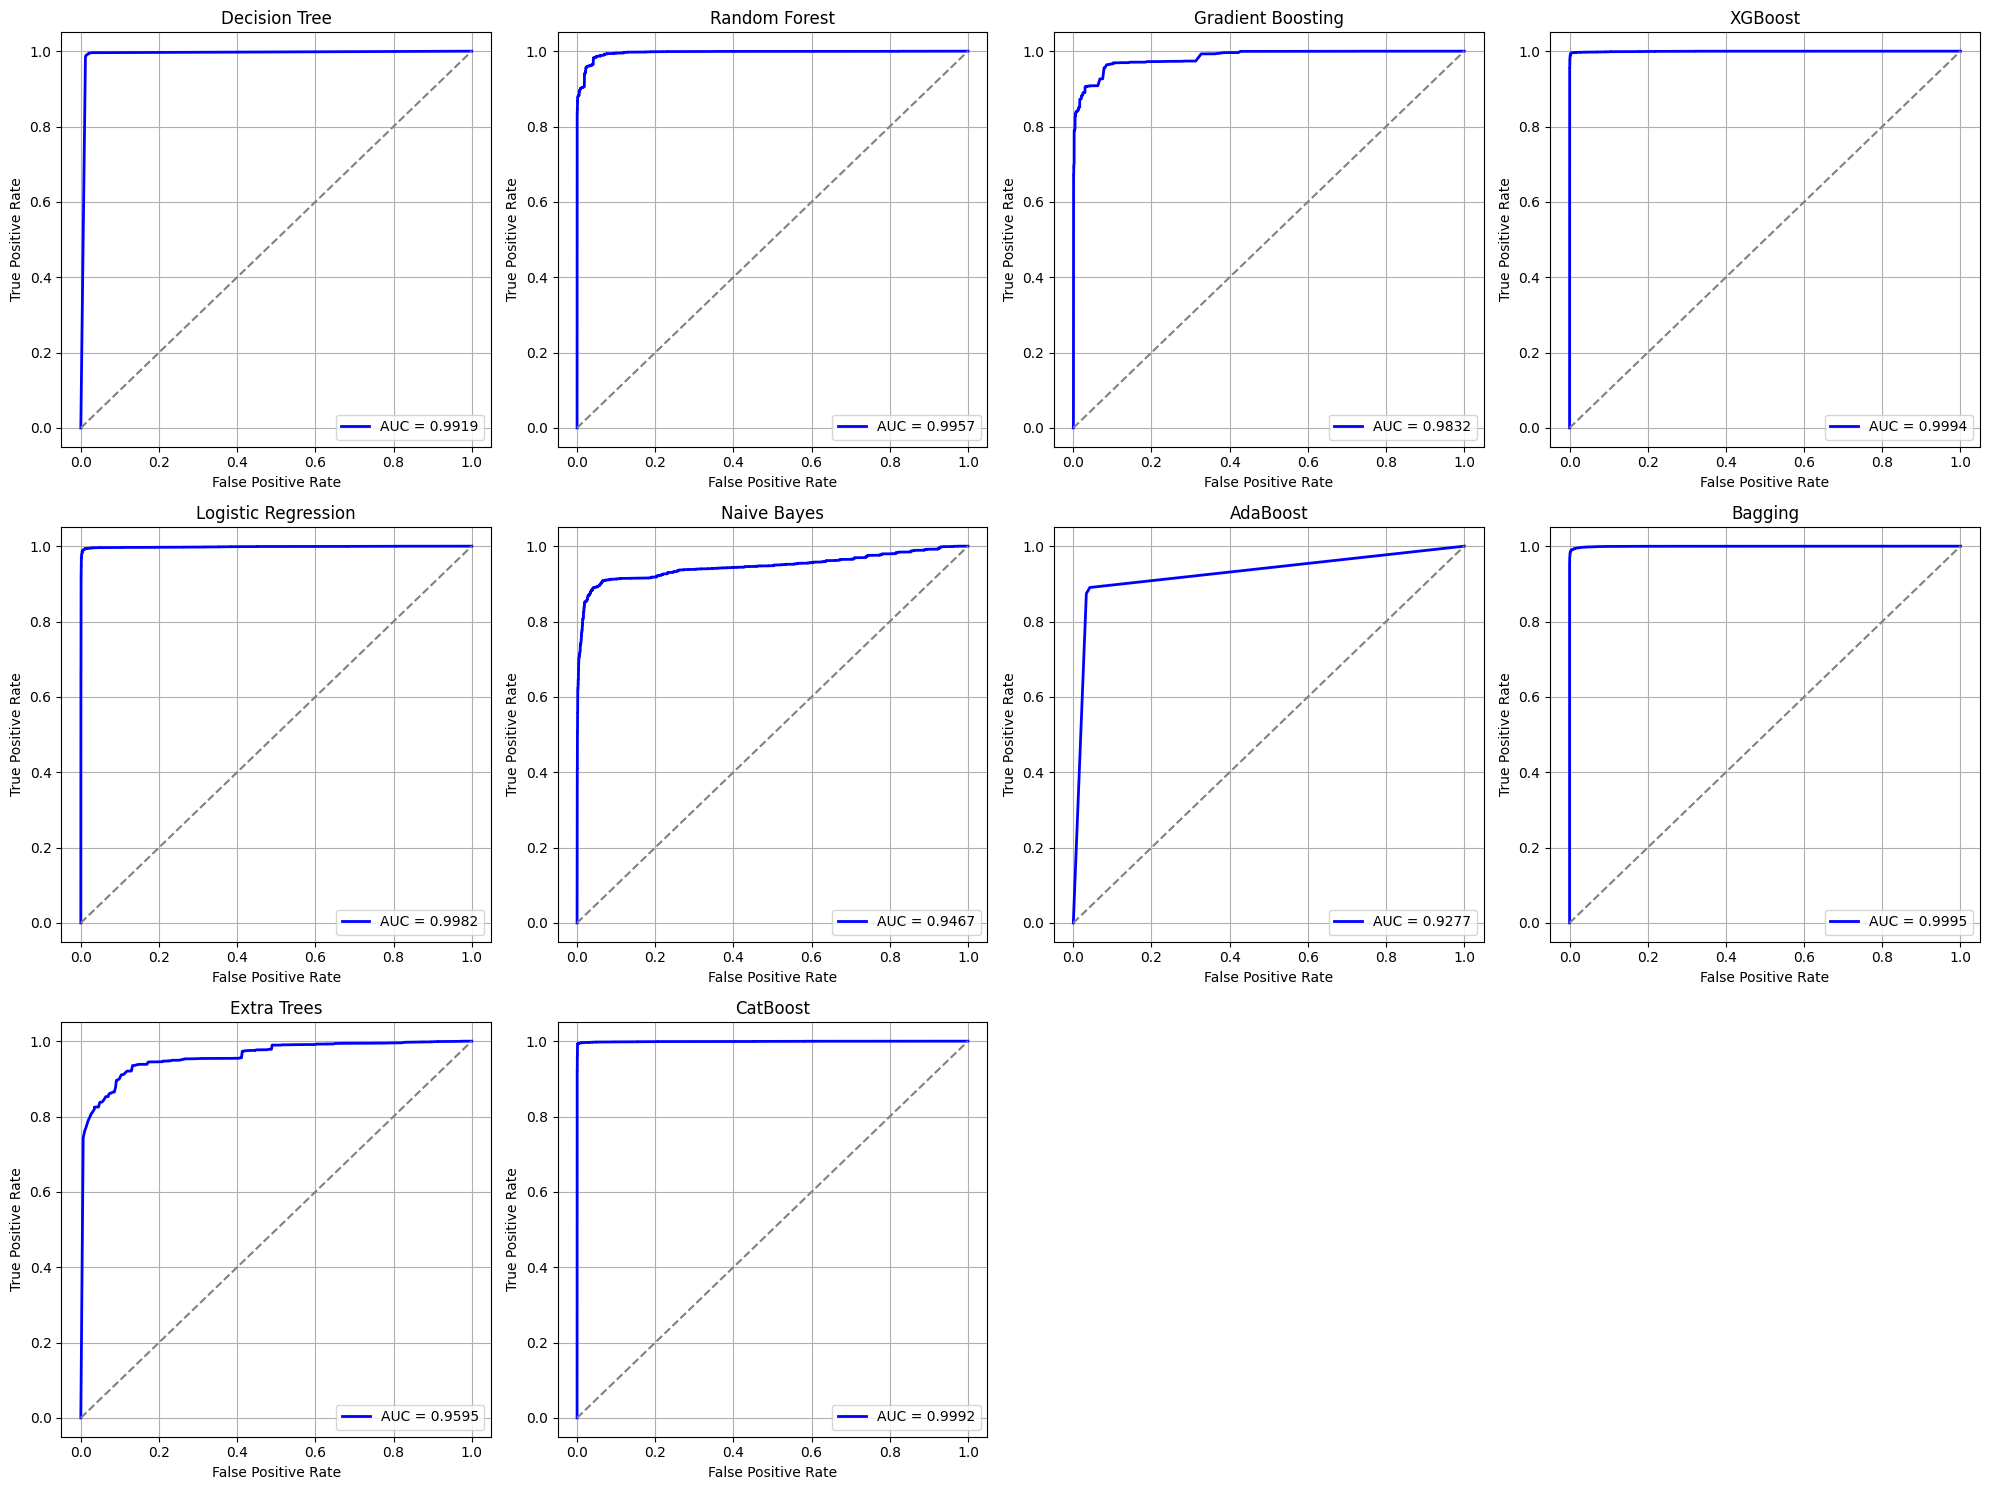

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Number of models
num_models = len(models)

# Create subplots: Adjust based on the number of models
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Adjust grid size if necessary
axes = axes.flatten()

# Plot ROC Curves for all models in subplots
for i, (model_name, model) in enumerate(models.items()):
    # Check if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve in respective subplot
    ax = axes[i]
    ax.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
    ax.set_title(model_name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

# Hide any extra empty subplots
for j in range(num_models, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [82]:
from sklearn.metrics import roc_auc_score

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = MinMaxScaler().fit_transform(model.decision_function(X_test).reshape(-1, 1)).flatten()
    
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} AUC Score: {auc_score:.2f}")


Decision Tree AUC Score: 0.99
Random Forest AUC Score: 1.00
Gradient Boosting AUC Score: 0.98
XGBoost AUC Score: 1.00
Logistic Regression AUC Score: 1.00
Naive Bayes AUC Score: 0.95
AdaBoost AUC Score: 0.93
Bagging AUC Score: 1.00
Extra Trees AUC Score: 0.96
CatBoost AUC Score: 1.00


### Conclusion:


In [83]:
# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier on the entire dataset
XGBoost_model = XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=800)
XGBoost_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
import pickle

# File path for saving the pickle file
pickle_file_path = "UPI Fraud Detection Final.pkl"

# Save the trained XGBoost model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(XGBoost_model, file)
